In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.1.3', '2.2.3', '0.13.2', '3.10.0')

# 1. Load Data

In [3]:
df = pd.read_csv('Cars.csv')

In [4]:
# print the first row of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# check the shape of your data
df.shape

(8128, 13)

In [6]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# 2. Exploratory Data Analysis and preprocessing

In [9]:
# Drop the 'torque' column
df = df.drop(columns=['torque'])

In [10]:
## Check fuel types distribution
print(df['fuel'].value_counts())

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64


### 2.1 Univariate analyis

Single variable exploratory data anlaysis

#### Count Plot

<Axes: xlabel='fuel', ylabel='count'>

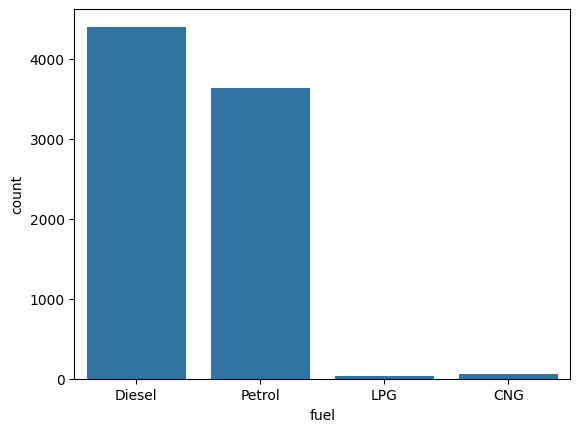

In [11]:
# Let's see how many types of fuel there are
sns.countplot(data = df, x = 'fuel')

#### Distribution Plot

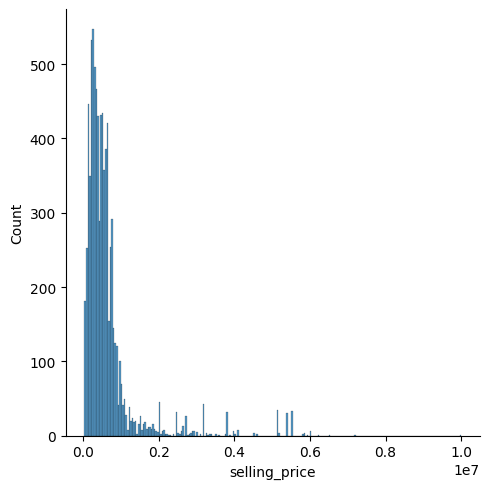

In [12]:
# distribution plot for "Selling Price"

sns.displot(data = df, x = 'selling_price')

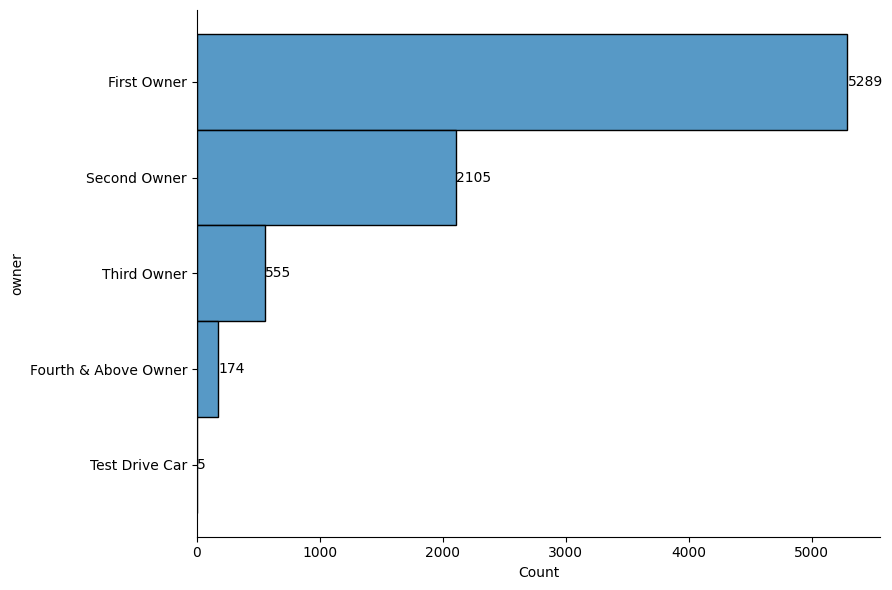

In [13]:
# distibution of types of owner
# making a distribution plot with horizontal bars
sns_plot = sns.displot(data=df, y='owner', height=6, aspect=1.5)

# Add count annotations to each bar 
for container in sns_plot.ax.containers:
    sns_plot.ax.bar_label(container, fmt='%d', label_type='edge')  # Format as an integer



In [14]:
# Removing all rows with CNG and LPG
df= df[~df['fuel'].isin(['CNG', 'LPG'])]

#Checking again
print(df['fuel'].value_counts())

df.shape     

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64


(8033, 12)

In [15]:
# Remove 'kmpl' and convert to float in mileage column
df['mileage'] = df['mileage'].str.split(' ').str[0]  # Extract numeric part
df['mileage'] = df['mileage'].astype(float)          # Convert to float

In [16]:
# Remove 'CC' and convert to float in engine column
df['engine'] = df['engine'].str.split(' ').str[0]  # Extract numeric part
df['engine'] = df['engine'].astype(float)          # Convert to float

In [17]:
# Remove 'bhp' and convert to float in max_power column
df['max_power'] = df['max_power'].str.split(' ').str[0]  # Extract numeric part
df['max_power'] = df['max_power'].astype(float)          # Convert to float

In [18]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [19]:
# Extract only the first word in the 'brand' column
df['name'] = df['name'].str.split(' ').str[0]

In [20]:
# Rename column
df.rename(columns={'name':'brand'},inplace=True)

In [21]:
#check again
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


#### Mapping (For the feature owner, map First owner to 1, ..., Test Drive Car to 5)

In [22]:
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
df['owner'] = df['owner'].map(owner_mapping)

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


#### 2.2 Multivariate Analysis

#### Multiple variable explortary data analysis

#### Bar Plot (Mean Selling Price per Owner)

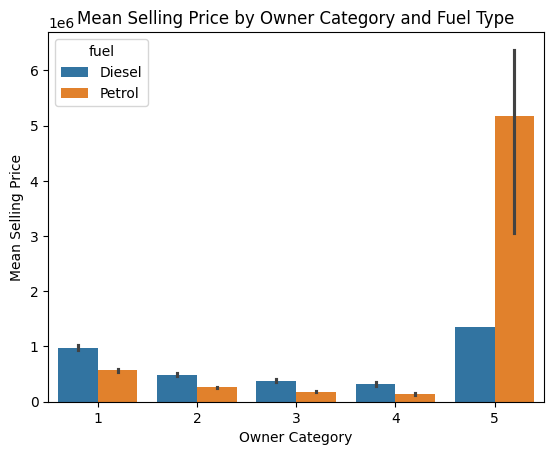

In [23]:
sns.barplot(x='owner', y='selling_price', hue='fuel', data=df, estimator='mean')
plt.xlabel("Owner Category")
plt.ylabel("Mean Selling Price")
plt.title("Mean Selling Price by Owner Category and Fuel Type")
plt.show()


### Key Insights
1.	Most Expensive Category:
*	Test drive cars (Owner Category 5) have the highest mean selling prices, especially for petrol cars.
2.	Depreciation with Ownership:
*	Selling price decreases with the number of previous owners, regardless of fuel type.
3.	Diesel Cars Are Generally More Expensive:
*	Except for test drive cars, Diesel vehicles consistently have higher mean selling prices across ownership categories.


In [24]:
# Based on our barplot analysis, Test Drive Cars are ridiculously expensive. 
# therefore we will delete all samples related to it 

# Filter out rows where the owner column is 5 (Test Drive Car)
df = df[df['owner'] != 5]

#Checking again
print(df['owner'].value_counts())

df.head()



owner
1    5238
2    2073
3     547
4     170
Name: count, dtype: int64


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the selling price of cars.  It's also for checking whether certain features are too correlated.

#### Tips: Label encoding

Now we would like to change "Developing" and "Developed" to "0" and "1", since machine learning algorithms do not understand text.   Also, correlation matrix and other similar computational tools require label encoding.

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()

array([0, 1])

In [26]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

df["transmission"].unique()

array([1, 0])

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

df["seller_type"].unique()

array([1, 0, 2])

In [29]:
# Retrieve the mapping of classes to numbers
mapping = {label: index for index, label in enumerate(le.classes_)}
print("Label Encoding Mapping:", mapping)


Label Encoding Mapping: {'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2}


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Create a new column for the encoded values
df['brand_encoded'] = le.fit_transform(df['brand'])

# Check the unique encoded values
print(df['brand_encoded'].unique())

# If you want to check the mapping between original and encoded values
print(le.classes_)  # Displays the original class order


[20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25]
['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [31]:
# Saving the names and what they map to in a dictionary to put into model file
brand_encoded_map = {}
keys = le.classes_
values = df.brand_encoded.unique()
for key in keys:
    for value in values:
        brand_encoded_map[key] = value
        values = np.delete(values, np.where(values == value))
        break

brand_encoded_map

{'Ambassador': np.int64(20),
 'Ashok': np.int64(27),
 'Audi': np.int64(10),
 'BMW': np.int64(11),
 'Chevrolet': np.int64(29),
 'Daewoo': np.int64(9),
 'Datsun': np.int64(26),
 'Fiat': np.int64(19),
 'Force': np.int64(28),
 'Ford': np.int64(4),
 'Honda': np.int64(7),
 'Hyundai': np.int64(6),
 'Isuzu': np.int64(14),
 'Jaguar': np.int64(21),
 'Jeep': np.int64(22),
 'Kia': np.int64(2),
 'Land': np.int64(30),
 'Lexus': np.int64(3),
 'MG': np.int64(23),
 'Mahindra': np.int64(17),
 'Maruti': np.int64(13),
 'Mercedes-Benz': np.int64(16),
 'Mitsubishi': np.int64(18),
 'Nissan': np.int64(31),
 'Opel': np.int64(5),
 'Peugeot': np.int64(15),
 'Renault': np.int64(8),
 'Skoda': np.int64(0),
 'Tata': np.int64(1),
 'Toyota': np.int64(12),
 'Volkswagen': np.int64(24),
 'Volvo': np.int64(25)}

In [32]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_encoded
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0,20
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0,27
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0,10
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0,11
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0,20


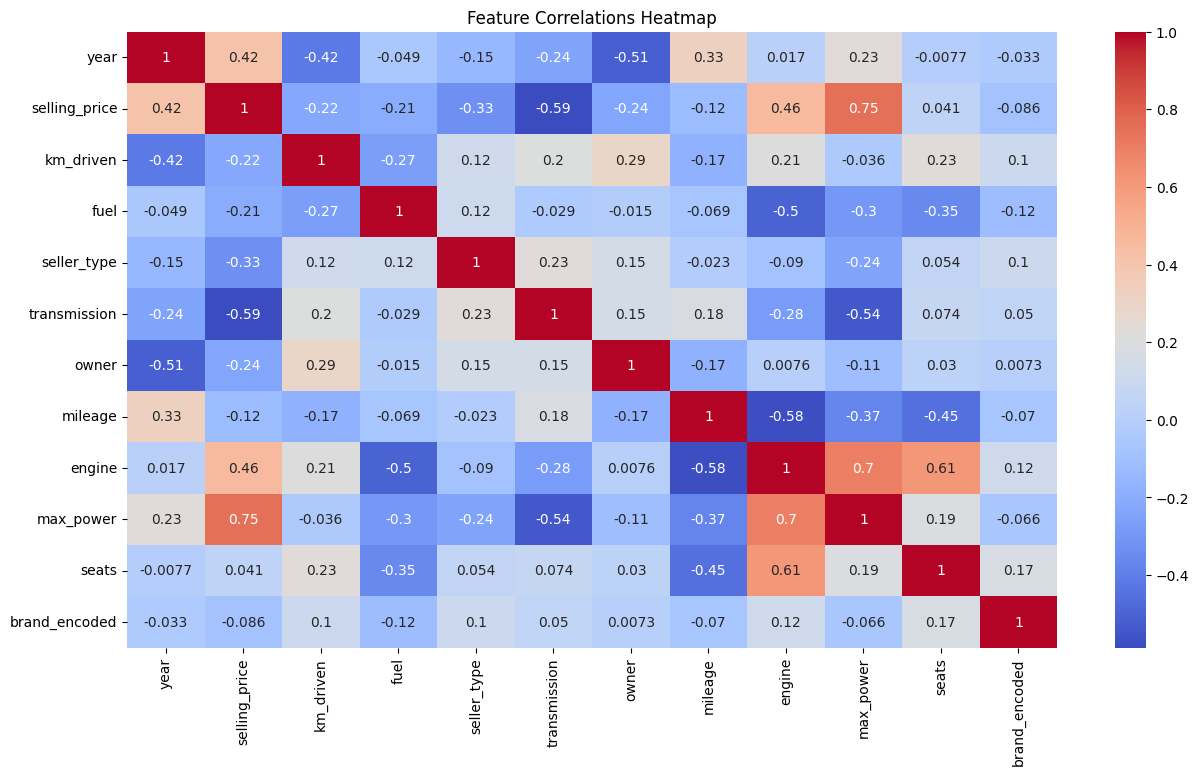

In [33]:
# Create a copy of the DataFrame and drop non-numeric columns
cars_price_temp = df.copy()  # Ensure you're copying the correct DataFrame name
cars_price_temp.drop(['brand'], axis='columns', inplace=True)  # Drop non-numeric columns like 'brand'

# Plot the heatmap for correlations
plt.figure(figsize=(15, 8))  # Set figure size
sns.heatmap(cars_price_temp.corr(), annot=True, cmap="coolwarm")  # Plot the correlation heatmap
plt.title("Feature Correlations Heatmap")  # Add a title
plt.show()  # Display the plot




# 4. Feature Selection

In [34]:
#x is our strong features
X = df[['brand_encoded','engine', 'max_power','transmission','year']]

#y is simply the selling_price col
y = df["selling_price"]

In [35]:
# Apply log transformation to the 'selling_price' column and assign it to y
df['selling_price'] = np.log(df['selling_price'])  # Update the DataFrame column
y = df['selling_price']  # Assign the updated column to y for your model

# Verify the values
print(df.head())  # Check the DataFrame
print(y.head())   # Check the y variable


     brand  year  selling_price  km_driven  fuel  seller_type  transmission  \
0   Maruti  2014      13.017003     145500     0            1             1   
1    Skoda  2014      12.821258     120000     0            1             1   
2    Honda  2006      11.970350     140000     1            1             1   
3  Hyundai  2010      12.323856     127000     0            1             1   
4   Maruti  2007      11.775290     120000     1            1             1   

   owner  mileage  engine  max_power  seats  brand_encoded  
0      1    23.40  1248.0      74.00    5.0             20  
1      2    21.14  1498.0     103.52    5.0             27  
2      3    17.70  1497.0      78.00    5.0             10  
3      1    23.00  1396.0      90.00    5.0             11  
4      1    16.10  1298.0      88.20    5.0             20  
0    13.017003
1    12.821258
2    11.970350
3    12.323856
4    11.775290
Name: selling_price, dtype: float64


#### Train/ Test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 5. Preprocessing

In [37]:
#check for null values
X_train[['brand_encoded','engine', 'max_power','transmission','year']].isna().sum()

brand_encoded      0
engine           154
max_power        149
transmission       0
year               0
dtype: int64

In [38]:
#check for null values
X_test[['brand_encoded','engine', 'max_power','transmission','year']].isna().sum()

brand_encoded     0
engine           60
max_power        59
transmission      0
year              0
dtype: int64

In [39]:
y_train.isna().sum()

np.int64(0)

In [40]:
y_test.isna().sum()

np.int64(0)

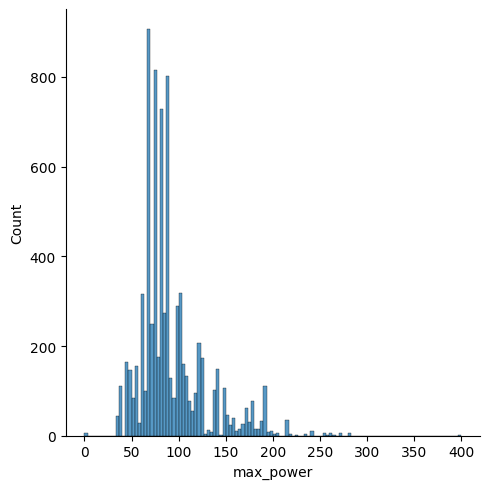

In [41]:
sns.displot(data=df, x='max_power')

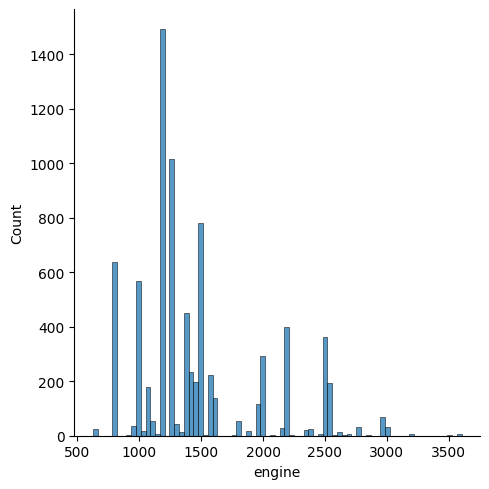

In [42]:
sns.displot(data=df, x='engine')

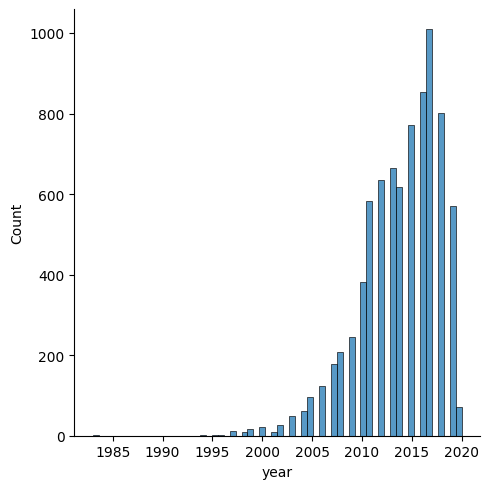

In [43]:
sns.displot(data=df, x='year')

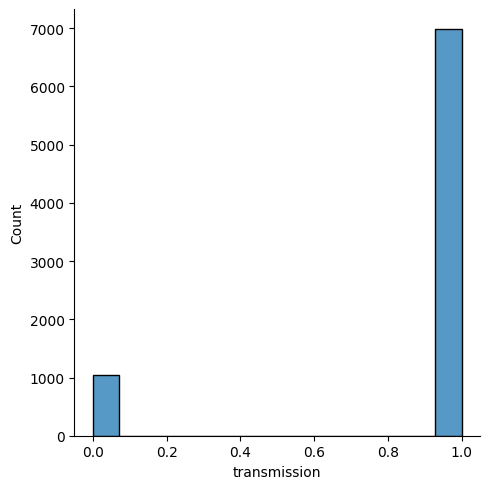

In [44]:
sns.displot(data=df, x='transmission')

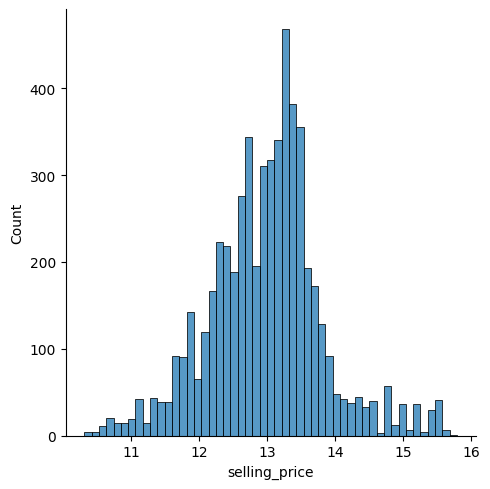

In [45]:
sns.displot(y_train)

In [46]:
#let's fill the training set first!

X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [47]:
#let's fill the testing set with the training distribution first!

X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [48]:
#check again
X_train[['brand_encoded','engine', 'max_power','transmission','year']].isna().sum()

brand_encoded    0
engine           0
max_power        0
transmission     0
year             0
dtype: int64

In [49]:
X_test[['brand_encoded','engine', 'max_power','transmission','year']].isna().sum()

brand_encoded    0
engine           0
max_power        0
transmission     0
year             0
dtype: int64

In [50]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

#### Checking Outliers

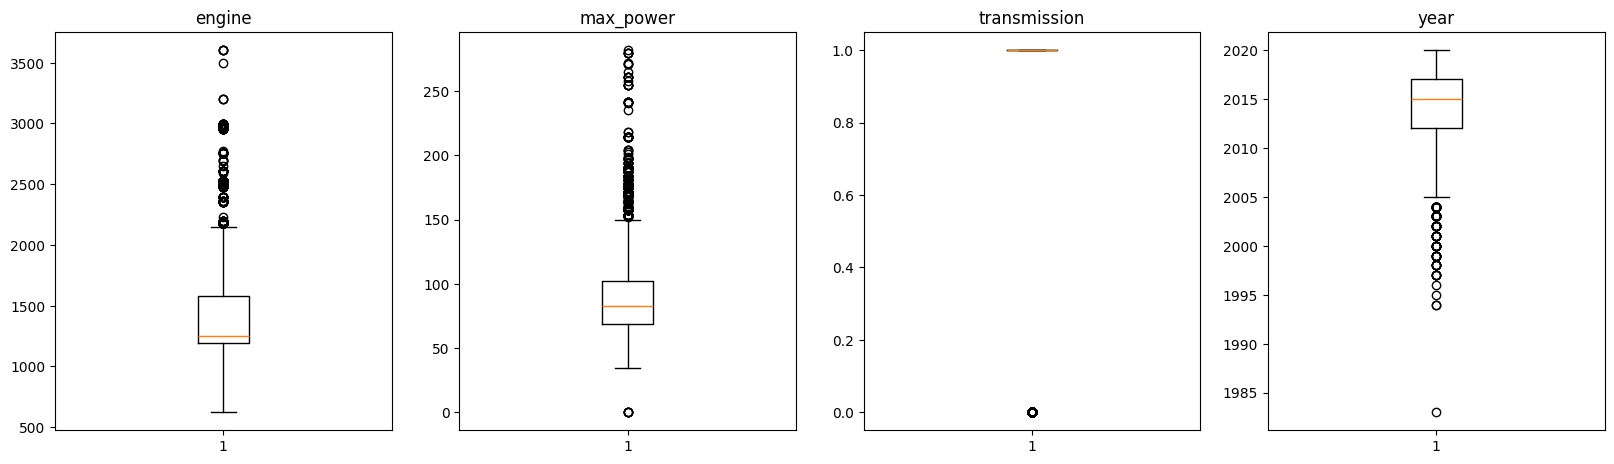

In [51]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2,'transmission':3,'year':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [52]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [53]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------transmission---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%


#### Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
import pickle
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
with open  ('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)



In [55]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 5)
Shape of X_test:  (2409, 5)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# Modeling

In [56]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.10286692956626244
r2:  0.8537963986163363


### Cross validation + Grid search

In [57]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [58]:
y_train.isna().sum()

np.int64(0)

#### Cross Validation

In [59]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.09435751 -0.1242007  -0.11232452 -0.0978698  -0.09804407]; Mean: -0.10535932105907922


SVR - Score: [-0.06912333 -0.06218232 -0.06413021 -0.06307071 -0.07786168]; Mean: -0.06727364981229064
KNeighbors Regressor - Score: [-0.05782195 -0.05790716 -0.05418246 -0.06340355 -0.05726738]; Mean: -0.05811649991122765
Decision-Tree Regressor - Score: [-0.06705246 -0.06493526 -0.07452666 -0.06377286 -0.062538  ]; Mean: -0.0665650477228814
Random-Forest Regressor - Score: [-0.05148114 -0.05252559 -0.0505833  -0.05442304 -0.05739151]; Mean: -0.053280915403855156


#### Random Forest has the best performance among all models, with the lowest average negative score.

### Grid Search

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [61]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 13}

In [62]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [63]:
best_mse  # ignore the minus because it's neg_mean_squared_error

np.float64(-0.05373854032606593)

# Testing

In [64]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.04900706546827266

# Analysis: Feature Importance

In [65]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.02883042, 0.08441682, 0.41106687, 0.00367753, 0.47200836])

#### Feature importance
* Feature 1: 'engine' 9.6% importance, Feature 2: 'max_power' 41.6% importance, 
* Feature 3: 'transmission' 0.34% very low contribution, Feature 5: 'year' 48.4% the most important feature.

In [66]:
# X is the input DataFrame. #If your training data (𝑋) was a pandas DataFrame, the feature names are the column names.
feature_names = X.columns 
print(feature_names)

Index(['brand_encoded', 'engine', 'max_power', 'transmission', 'year'], dtype='object')


<BarContainer object of 5 artists>

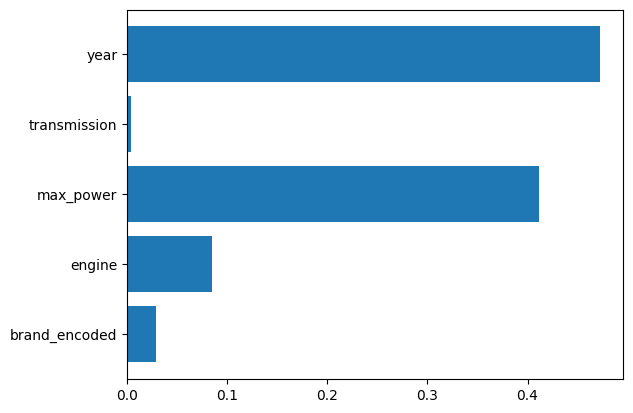

In [67]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

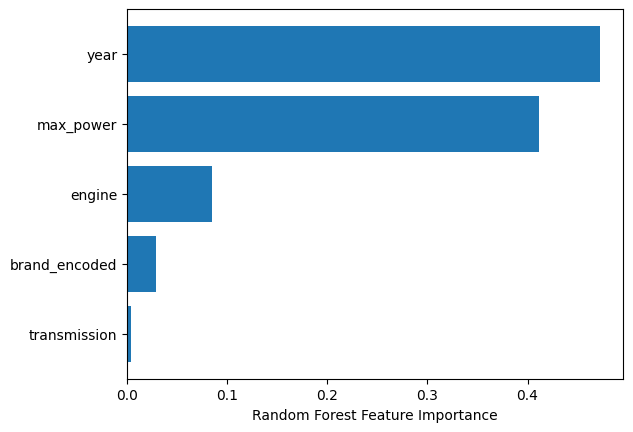

In [68]:
#Sorting
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

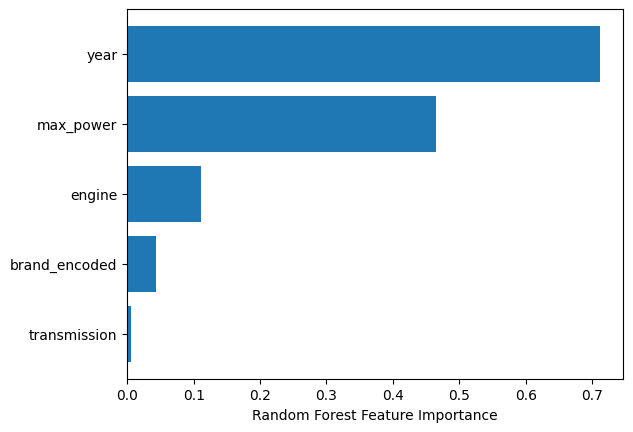

In [69]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [70]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

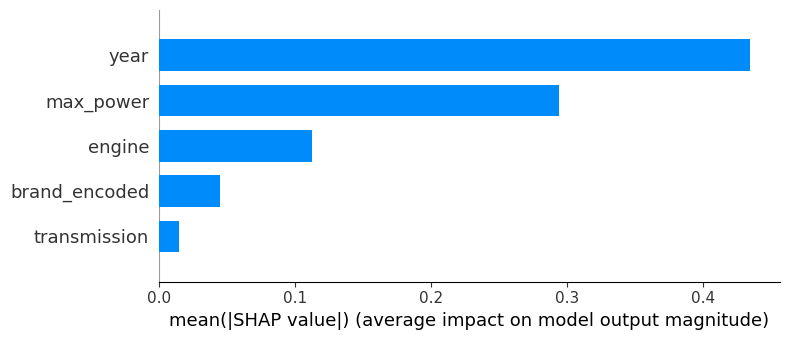

In [71]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

#### Inference

In [72]:
import pickle

# save the model to disk
filename = 'predicting_car_price.model'
pickle.dump(grid, open(filename, 'wb'))

In [73]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [74]:
# time to run some test prediction
# Let's get some features and lables data from some random dataset locations first
df[['brand_encoded','engine', 'max_power', 'transmission','year','selling_price']].loc[50]

brand_encoded      10.000000
engine           1498.000000
max_power          98.630000
transmission        1.000000
year             2015.000000
selling_price      12.959844
Name: 50, dtype: float64

In [75]:
#['engine', 'max_power', 'transmission','year','selling_price']
sample = np.array([[10, 1498.0,98.63,1.0,2015]])
sample= scaler.transform(sample)


predicted_car_price = loaded_model.predict(sample)
predicted_car_price = np.exp(predicted_car_price) # re-convert the predicted car prices into actual values from log values by using exponential function.
print(predicted_car_price)


[578299.0336336]


In [76]:
#Get the actual value of sample at row with index 30 
actual_value = np.exp(df.loc[50, 'selling_price'])  # Since selling_price is log-transformed
print(f"Actual value: {actual_value}")


Actual value: 424999.99999999965


In [77]:
# find the difference between predicted_car_price Vs actual_value to assess the prediction is reasonable or not. 
print(f"Predicted value: {predicted_car_price}")
print(f"Actual value: {actual_value}")

difference = abs(predicted_car_price - actual_value)
print(f"Difference: {difference}")


Predicted value: [578299.0336336]
Actual value: 424999.99999999965
Difference: [153299.0336336]


In [78]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_encoded
0,Maruti,2014,13.017003,145500,0,1,1,1,23.40,1248.0,74.00,5.0,20
1,Skoda,2014,12.821258,120000,0,1,1,2,21.14,1498.0,103.52,5.0,27
2,Honda,2006,11.970350,140000,1,1,1,3,17.70,1497.0,78.00,5.0,10
3,Hyundai,2010,12.323856,127000,0,1,1,1,23.00,1396.0,90.00,5.0,11
4,Maruti,2007,11.775290,120000,1,1,1,1,16.10,1298.0,88.20,5.0,20
